### Hi


In [6]:
from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

import numpy as np
import matplotlib.pyplot as plt

Here we assign our various data points. They are well separated (an easy case). Note, we are also defining an arbitrary w and b.

In [7]:

#Data Set
x_neg = np.array([[3, 4], [1, 4], [2, 3]])
y_neg = np.array([-1, -1, -1])

x_pos = np.array([[6, -1], [7, -1], [5, -3]])
y_pos = np.array([1, 1, 1])

x1 = np.linspace(-10, 10)
x = np.vstack((np.linspace(-10, 10), np.linspace(-10, 10)))

X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos, y_neg))

w = np.array([1.5, -0.5]).reshape(-1, 1)
b = [-3]

Now let's have a look at our data visually. We've done a little bit of algebra to 'recreate' our line.

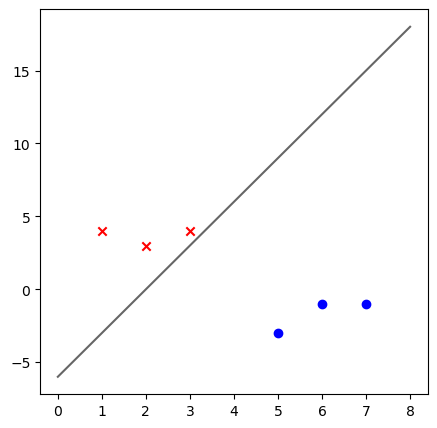

In [8]:

x1 = np.linspace(-0, 8)
fig = plt.figure(figsize = (5, 5))

plt.scatter(x_neg[:, 0], x_neg[:, 1], marker = 'x', color = 'r', label = 'Negative (-1)')
plt.scatter(x_pos[:, 0], x_pos[:, 1], marker = 'o', color = 'b', label = 'Positive (+1)')
plt.plot(x1, ((-w[0] * x1 - b[0])/w[1]).flatten(), color = 'k', alpha = 0.6, label = 'old boundary')

In [21]:
# Initialising values and computing H
m, n = X.shape
y = y.reshape(-1, 1) * 1.0
X_dash = y * X
H = np.dot(X_dash, X_dash.T) * 1.0

# CVXOPT formatting
P = cvxopt_matrix(H)                    # yX(yX)'
q = cvxopt_matrix(-np.ones((m, 1)))     # Lots of -1
G = cvxopt_matrix(-np.eye(m))           # Identity matrix
h = cvxopt_matrix(np.zeros(m))          # Lots of zeros
A = cvxopt_matrix(y.reshape(1, -1))     # y with different dimensions
b = cvxopt_matrix(np.zeros(1))          # more zeros

# Setting solver parameters
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

# Solve our problem
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

# Calculate our w (from lectures SUM(ai * yi * xi))
w = ((y * alphas).T @ X).reshape(-1, 1)

# Finding the non-zero alphas
S = (alphas > 1e-4).flatten()

# B is y - x.W
b = y[S] - np.dot(X[S], w)
print("Alphas = ", alphas[alphas > 1e-4])
print("w:", w.T, ", b:", b.T)


Alphas =  [0.0625     0.06249356]
w: [[ 0.24999356 -0.25000644]] , b: [[-0.74996781 -0.74996781]]


Let's draw it a second time, this time with a real 'w' and 'b'.

Text(0, 0.5, '$x_2$')

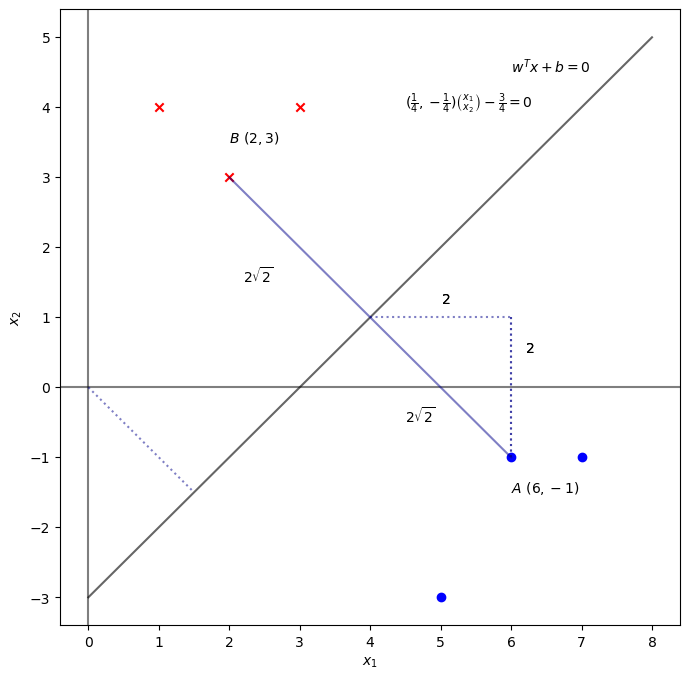

In [48]:
x1 = np.linspace(-0, 8)
fig = plt.figure(figsize = (8, 8))
plt.scatter(x_neg[:, 0], x_neg[:, 1], marker = 'x', color = 'r', label = 'Negative (-1)')
plt.scatter(x_pos[:, 0], x_pos[:, 1], marker = 'o', color = 'b', label = 'Positive (+1)')
plt.plot(x1, ((-w[0] * x1 - b[0])/w[1]).flatten(), color='k', alpha = 0.6, label = 'new boundary')


#Lines
plt.axvline(0, color = 'black', alpha = 0.5)
plt.axhline(0, color = 'black', alpha = 0.5)
plt.plot([2, 6], [3, -1], linestyle = '-', color = 'darkblue', alpha = 0.5)
plt.plot([4, 6], [1, 1], [x_pos[0, 0], x_pos[0, 0]], [1, -1], linestyle= ":", color = 'darkblue', alpha = 0.5)
plt.plot([0, 1.5], [0, -1.5], [x_pos[0, 0], x_pos[0, 0]], [1, -1], linestyle= ":", color = 'darkblue', alpha = 0.5)

plt.annotate(text = '$A \ (6, -1$)', xy = (5, -1), xytext = (6, -1.5))
plt.annotate(text = '$B \ (2, 3$)', xy = (2, 3), xytext = (2, 3.5))
plt.annotate(text = '$2$', xy = (5, 1.2), xytext = (5, 1.2))
plt.annotate(text = '$2$', xy = (6.2, 0.5), xytext = (6.2, 0.5))

plt.annotate(text = '$2\sqrt{2}$', xy = (4.5, -0.5), xytext = (4.5, -0.5))
plt.annotate(text = '$2\sqrt{2}$', xy = (2.2, 1.5), xytext = (2.2, 1.5))

plt.annotate(text = '$2$', xy = (5, 1.2), xytext = (5, 1.2))
plt.annotate(text = '$2$', xy = (6.2, 0.5), xytext = (6.2, 0.5))

plt.annotate(text = '$w^Tx + b = 0$', xy = (6, 4.5), xytext = (6, 4.5))
plt.annotate(text = '$(\\frac{1}{4}, -\\frac{1}{4}) \\binom{x_1}{x_2}- \\frac{3}{4} = 0$', xy = (4.5, 4), xytext = (4.5, 4))

plt.annotate(text = '$\\frac{3}{\sqrt{2}}$', xy = (0.5, -1), xytext = (0.5, -1))

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')